MNIST Dataset Overview
This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing.
MNIST Dataset


The first step is to import the classes and functions needed

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


Define the CNN model in PyTorch

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Transform and load the MNIST data using PyTorch

In [3]:

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=200, shuffle=True, num_workers=4)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=200, shuffle=False, num_workers=4)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Instantiate the model and define loss function and optimizer

In [4]:

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Training the model
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

# Testing the model
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

In [6]:
# Training and testing
for epoch in range(1, 7):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321208
Train Epoch: 1 [2000/60000 (3%)]	Loss: 1.013322
Train Epoch: 1 [4000/60000 (7%)]	Loss: 0.589283
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.457337
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.387033
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.280445
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.236730
Train Epoch: 1 [14000/60000 (23%)]	Loss: 0.268856
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.245579
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.259691
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.217783
Train Epoch: 1 [22000/60000 (37%)]	Loss: 0.140092
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.194531
Train Epoch: 1 [26000/60000 (43%)]	Loss: 0.144074
Train Epoch: 1 [28000/60000 (47%)]	Loss: 0.179391
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.195390
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.149683
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.163098
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.127506
Train Epoch: 1 [38000/60000 (63%)]	Loss: 0.043372
Train Epoch

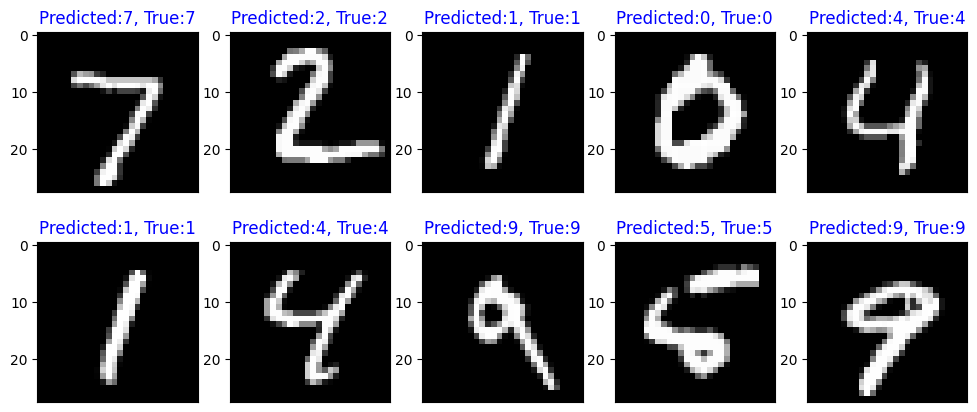

In [7]:
# Plot correctly predicted images
def plot_correctly_predicted_images(predictions, target, data):
    plt.figure(figsize=(12, 5))

    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.xticks([]), plt.yticks()

        plt.imshow(data[i][0].detach().numpy(), cmap='gray')

        predicted_label = np.argmax(predictions[i].detach().numpy())
        true_label = target[i].item()
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.title(f'Predicted:{predicted_label}, True:{true_label}', color=color)

# Getting a batch of test data
data, target = next(iter(test_loader))

# Run the model on the test data
output = model(data)

# Plot correctly predicted images from the batch
plot_correctly_predicted_images(output, target, data)

plt.show()